In [1]:
import pandas as pd
import collections
import heapq
import re
import matplotlib.pyplot as plt

In [2]:
#modify hashtag col to only have hash tag text

def get_hashtag_text(text):
    text= re.findall("\: \'\w+\'",text)
    hash_tag_list=[]
    for i in text:
        hashtag=re.findall("\w+",i)
    #print(type(hashtag))
        hashtag=hashtag[0]
    #print(hashtag)
        hash_tag_list.append(hashtag)
    
    return hash_tag_list

def modify_hashtags_col(hashtag_col):
    df['Hashtags']=df[hashtag_col].apply(lambda x: get_hashtag_text(x))
    return df

In [3]:
# read csv
df=pd.read_csv('brands_final_df.csv',index_col=0)

#get the hashtag
df=modify_hashtags_col('Hashtags')

#get KFC df
df_kfc=df[df['Keyword']=='kfc']


#get Burget King df
df_burger_king=df[df['Keyword']=='burger king']


#get McDonald df
df_McDonald =df[df['Keyword']=="McDonald's"]

# get pizza hut df
df_pizzahut=df[df['Keyword']=='pizzahut']


# get the hashtag as a list

#hashtag_li=get_hash_tag_li('Hashtags')

#return the number of appearance of each hash tag as  a dict dict_hashtag=collections.Counter(hashtag_li)





In [9]:
def get_hash_tag_li(hash_tag_col,df_define):
    df=df_define
    hasli = df[hash_tag_col].tolist()
    
    li = []
    
    for j in hasli:
        
        
        for i in j:
            if i != '[]':
                #print(type(i))
                i=i.replace("[","")
                i=i.replace("]","")
                i=i.replace("'","")
                #i=i[0:-1]
                li.append(i)
    return li

#get top x hashtag key and value
def get_hashtag_count(df_define,brand,top_x_hashtag,hash_tag_col,fig_size,file_name):
    
    df=df_define             
    hashtag_li=get_hash_tag_li(hash_tag_col,df)
    
    #return the number of appearance of each hash tag as  a dict dict_hashtag=collections.Counter(hashtag_li)
    dict_hashtag=collections.Counter(hashtag_li)    
    top_hashtag=heapq.nlargest(top_x_hashtag, dict_hashtag, key=dict_hashtag.get)
   
    #get the count of the top x hashtags
    score_hashtag=[dict_hashtag[hashtag] for hashtag in top_hashtag]

    #barh plot
    plt.figure(figsize =fig_size) 
    ax=plt.barh(top_hashtag,score_hashtag)


    #add grid line 
    plt.grid(True,linestyle = ':',alpha=1.0)

    #invert y axis
    plt.gca().invert_yaxis()

    #add annotation
    count=1
    for i in ax.patches: 
        #print(i)
        #print (ax.patches)
        if count==1:
            plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                     str(round((i.get_width()), 2)), 
                     fontsize = 30, fontweight ='bold', 
                     color ='red')
            count+=1
            print(count)
        else:
            plt.text(i.get_width()+0.2, i.get_y()+0.5,  
                     str(round((i.get_width()), 2)), 
                     fontsize = 30, fontweight ='bold', 
                     color ='black')
            
    # Formatting        
    plt.xticks(rotation=45)
    plt.xlabel('Count',fontsize= 30)
    plt.ylabel('Hashtags',fontsize= 30)
    max_date=df['Tweet Datetime'].max()
    min_date=df['Tweet Datetime'].min()
    plt.title(f'{brand} Top {top_x_hashtag} Hashtags count from {min_date} to {max_date}',fontsize= 35)



    plt.rc('xtick', labelsize=30) 
    plt.rc('ytick', labelsize=30)
   

    return plt.savefig(file_name)




2


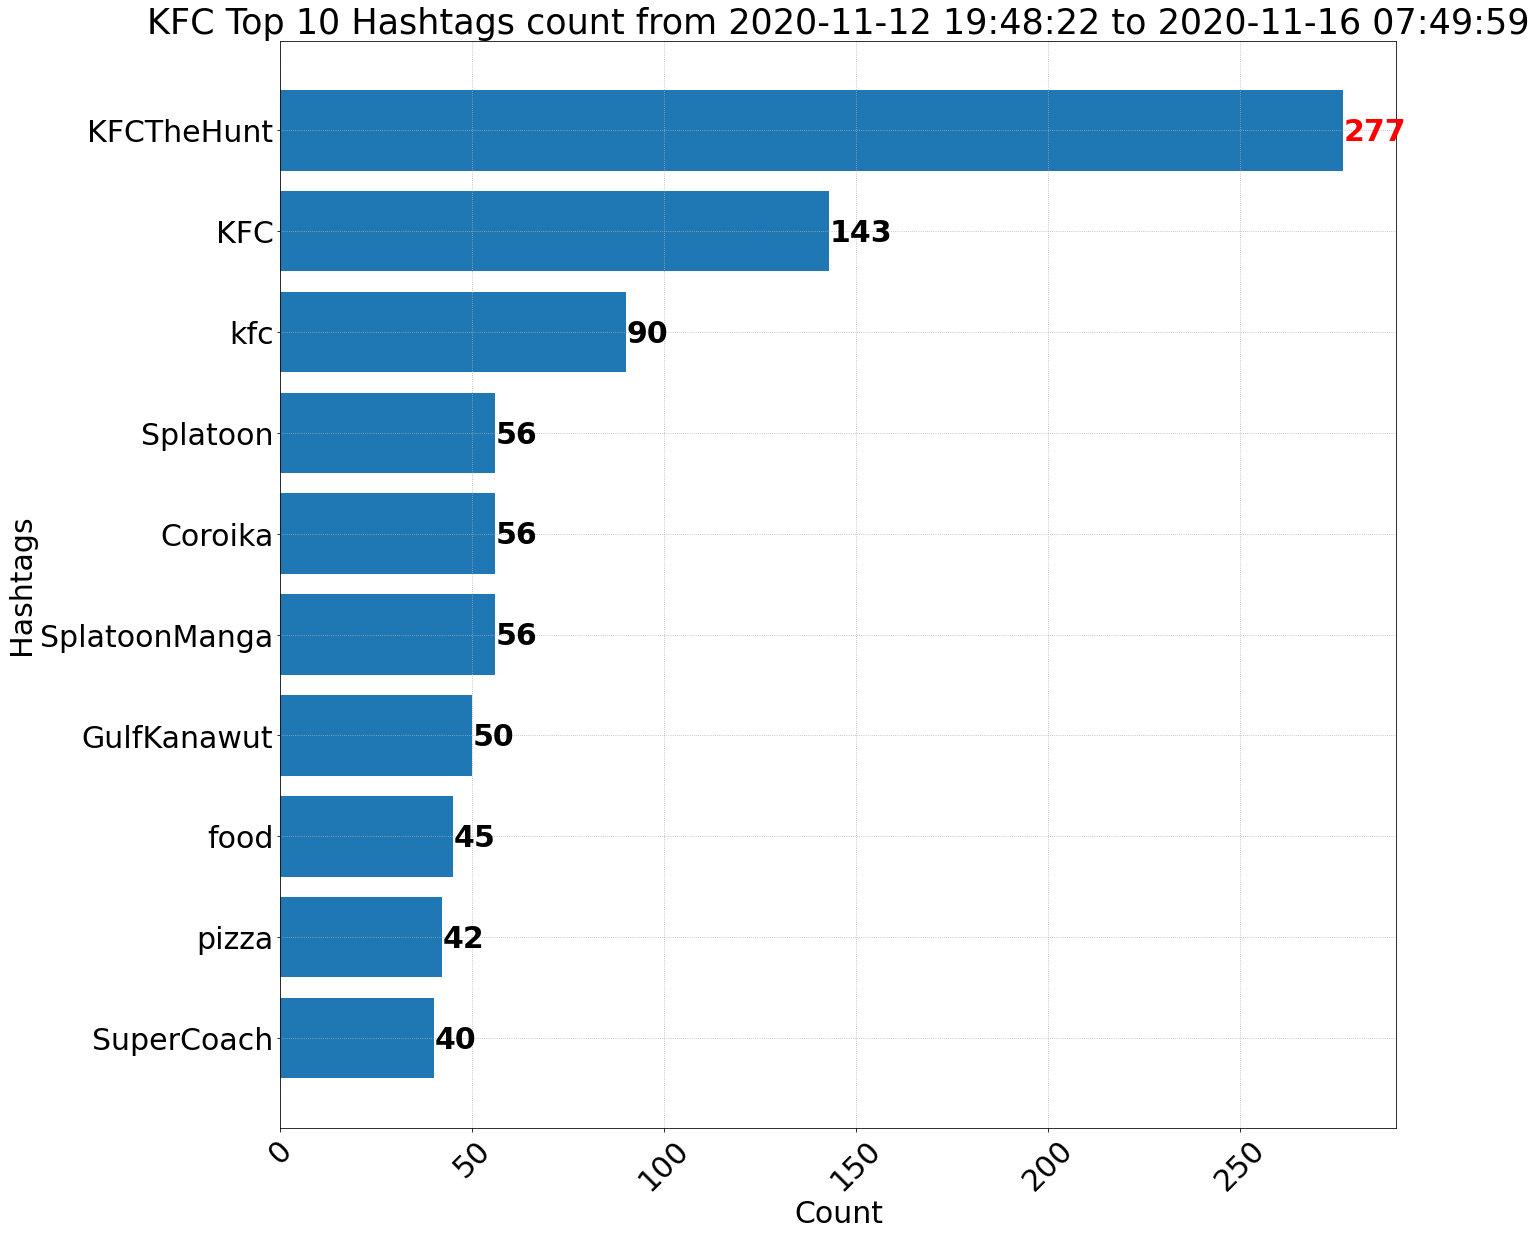

In [10]:
# KFC brand

get_hashtag_count(df_kfc,'KFC',10,'Hashtags',(20,20),'Top 10 KFC hashtag.png')

                                              Tweet Text       Tweet Datetime  \
0      RT @MothershipSG: ❗️From Nov. 19, McDonald's w...  2020-11-17 06:34:31   
1      RT @FalseRW: All the others attended ceremonie...  2020-11-17 06:34:25   
2      RT @JoePompliano: A former McDonald's cashier ...  2020-11-17 06:34:22   
3      @MysterySolvent American heroes arise from the...  2020-11-17 06:34:16   
4                          @MDeeezzyyy from McDonald’s?😍  2020-11-17 06:34:10   
...                                                  ...                  ...   
29995  RT @nctyarchive: [201114] MK \n\nI ate a big m...  2020-11-15 02:27:48   
29996  RT @whatsuptucson: McDonald's guy struck by ve...  2020-11-15 02:27:33   
29997  RT @whatsuptucson: McDonald's: Guy that was do...  2020-11-15 02:27:25   
29998  RT @whatsuptucson: Pedestrian struck by vehicl...  2020-11-15 02:27:22   
29999  @BubbleWoj Is Danny green a McDonald’s manager...  2020-11-15 02:27:21   

           Tweet Id   Twitt

C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0, flags=flags)


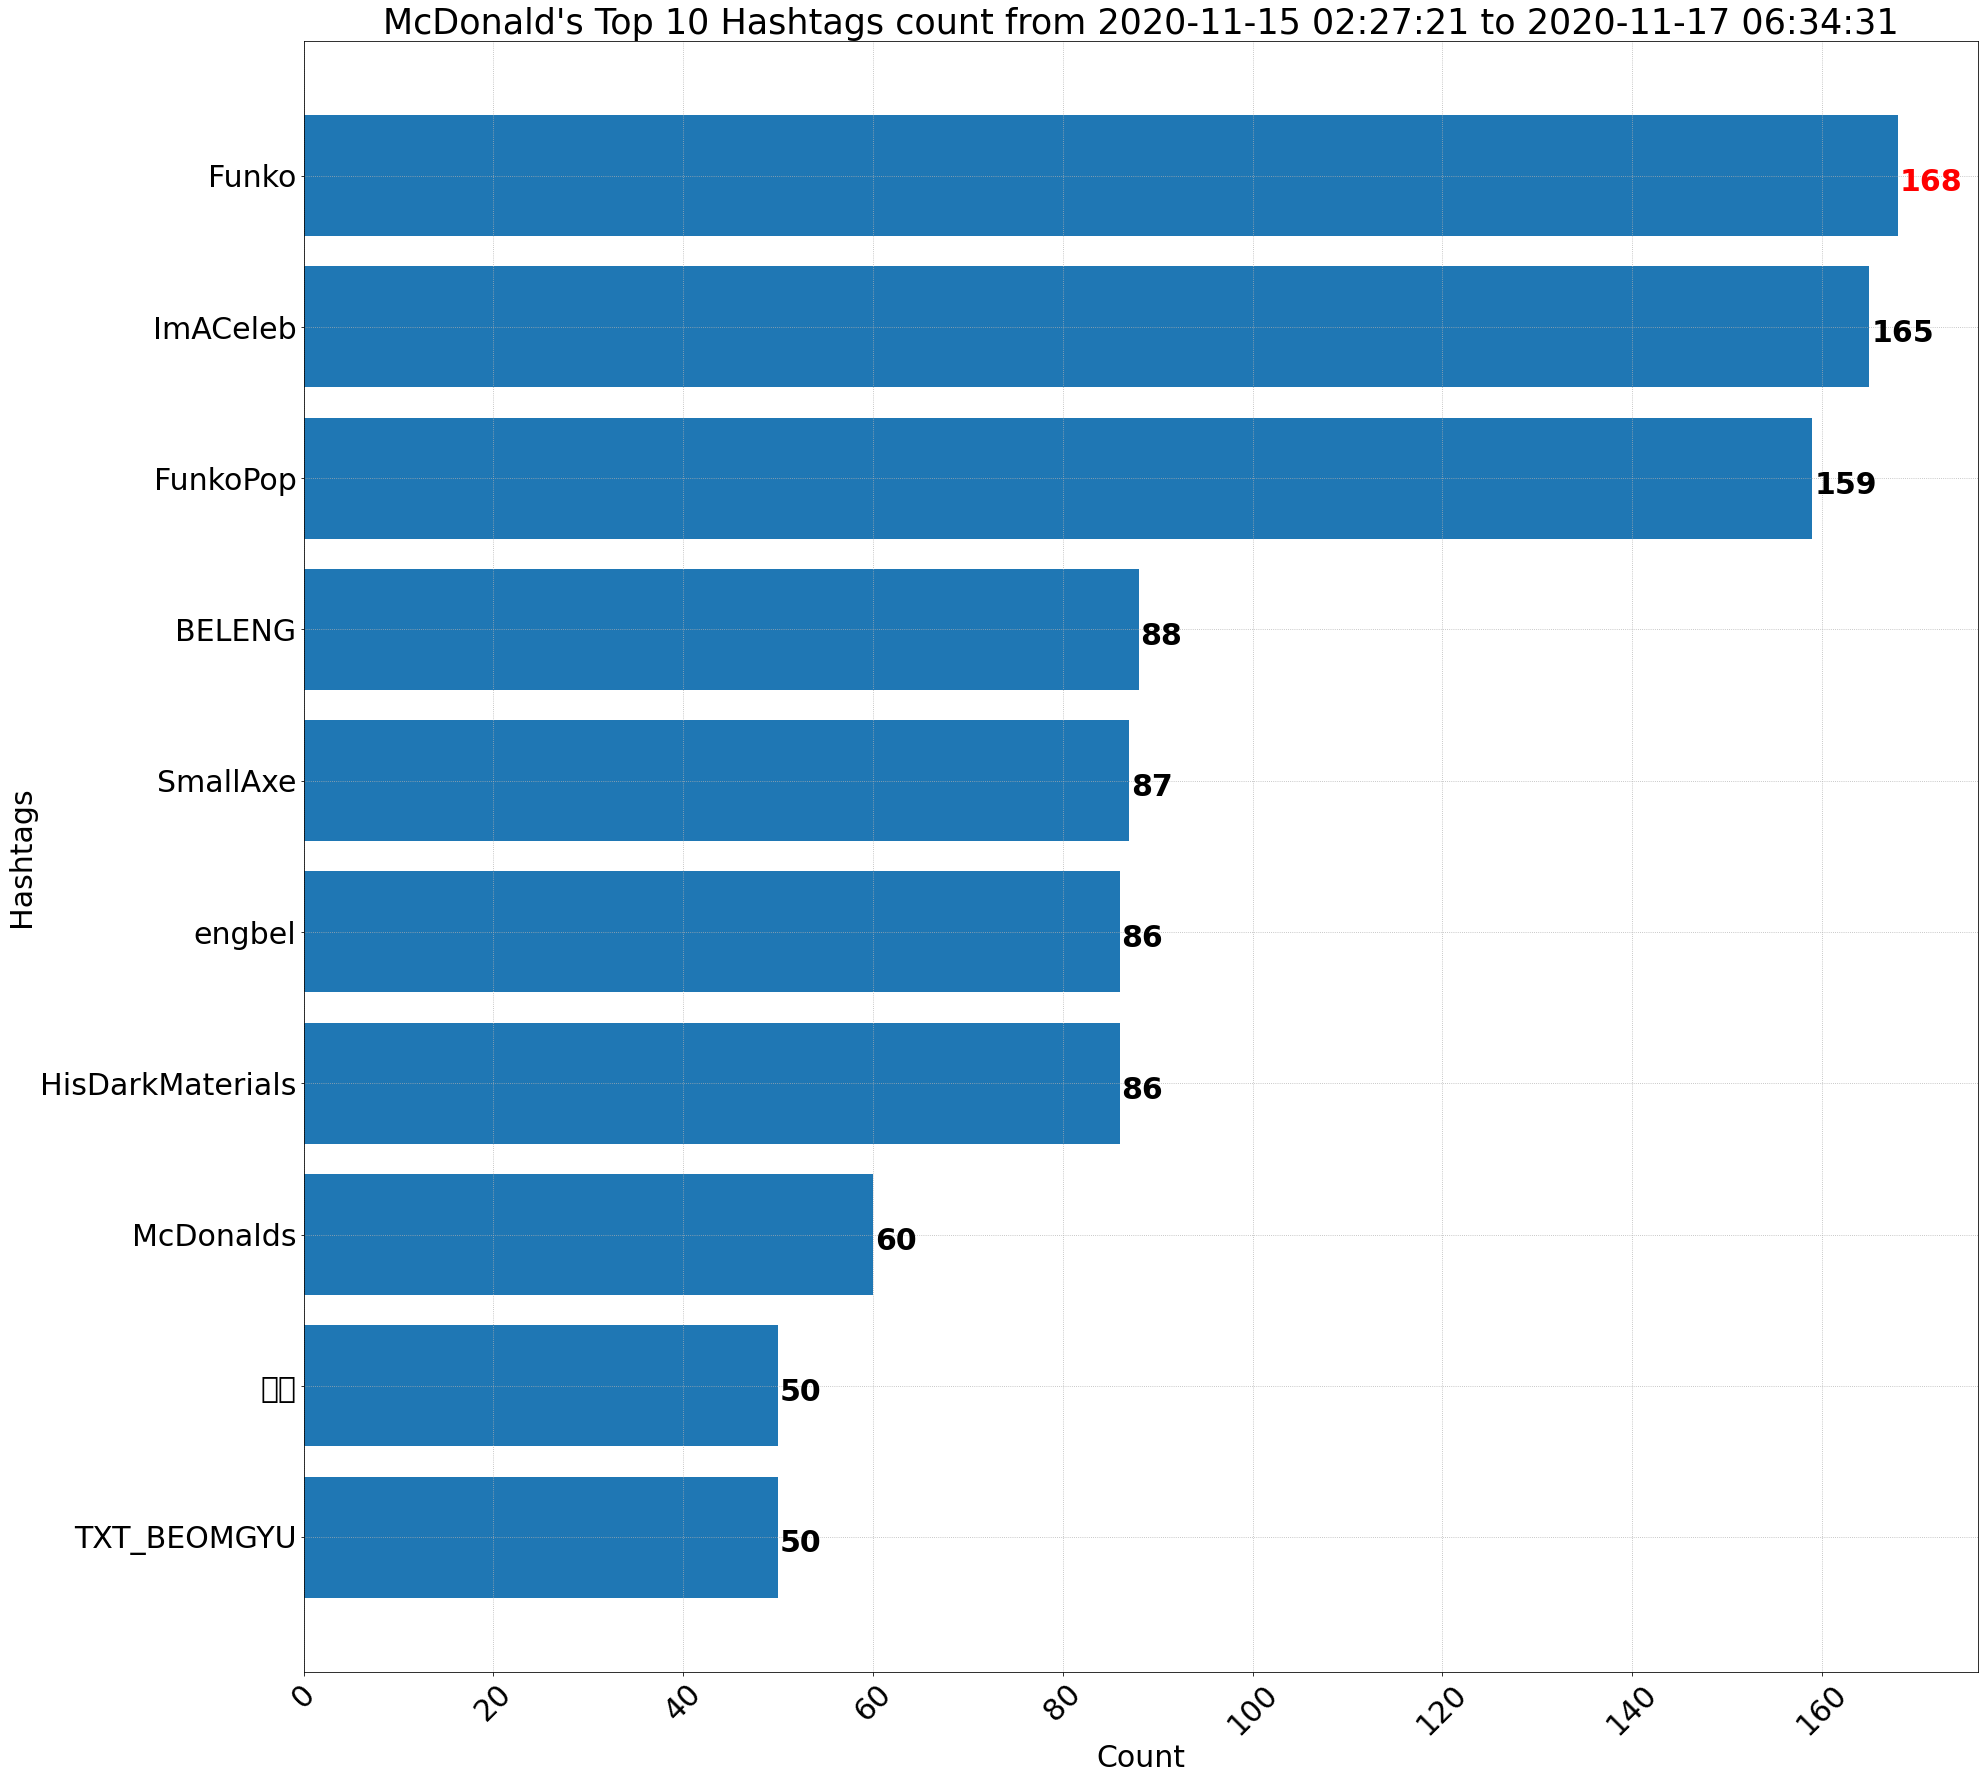

In [161]:
#McDonald brand

get_hashtag_count(df_McDonald,"McDonald's",10,"Hashtags",(30,30),"Top 10 McDonald's hashtag.png")

                                              Tweet Text       Tweet Datetime  \
19999  RT @weibotranslate: 20201116 Burger King weibo...  2020-11-16 13:41:56   
20000  RT @EXOPublicity: Zhang Yixing Burger King upd...  2020-11-16 13:41:36   
20001  RT @EXOPublicity: Zhang Yixing Burger King upd...  2020-11-16 13:40:50   
20002  @marsvii7 omgg i have a feeling some us fast f...  2020-11-16 13:40:27   
20003  it feels like Burger King should’ve died with ...  2020-11-16 13:40:03   
...                                                  ...                  ...   
39994              @nicekicks Fancy Burger King managers  2020-11-09 19:49:20   
39995  @SwiggyCares i have ordered food from burger k...  2020-11-09 19:49:13   
39996  @wellesleytales @JohnOberg @domcavendish @McDo...  2020-11-09 19:48:38   
39997  @1stEvilWench @SexytotheNorth well here in St....  2020-11-09 19:48:33   
39998  burger king may be hard mid but jalapeno poppe...  2020-11-09 19:48:22   

           Tweet Id   Twitt

C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ki993\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from c

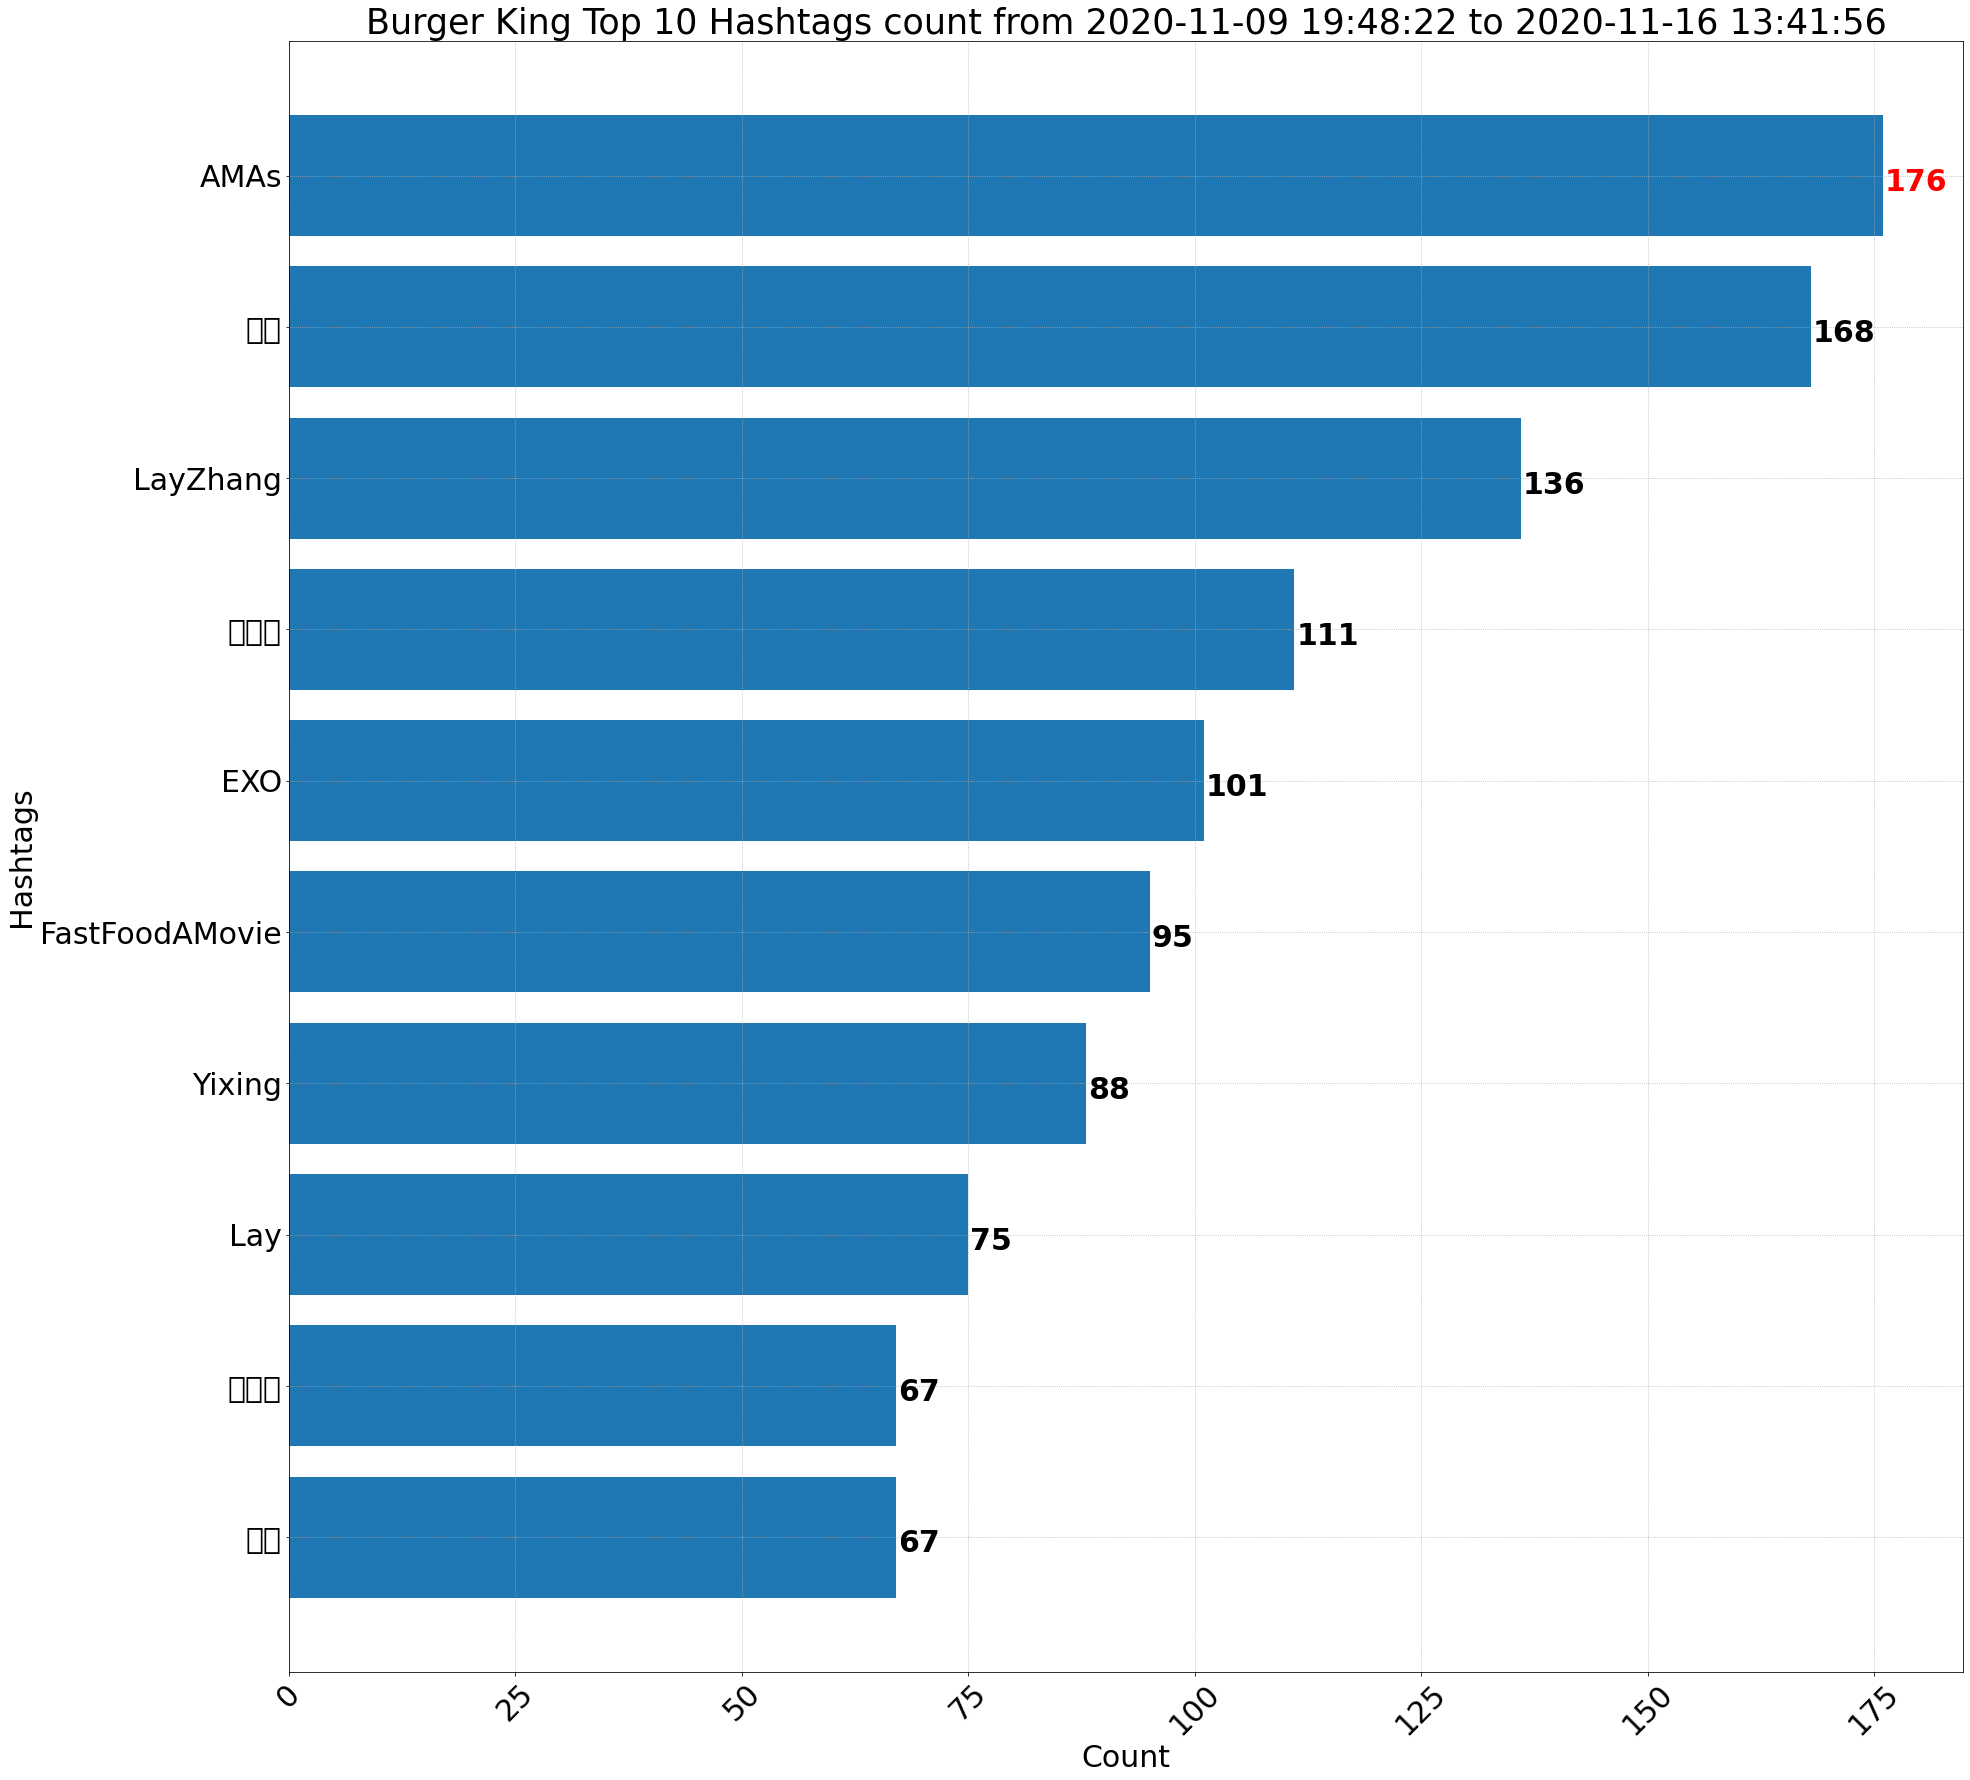

In [160]:
# Burger King brand

get_hashtag_count(df_burger_king,"Burger King",10,"Hashtags",(30,30),"Top 10 Burger King hashtag.png")



                                              Tweet Text       Tweet Datetime  \
39999  RT @pizzahut: Nothing is as it seems. You have...  2020-11-17 04:00:24   
40000  This felt like it was missing something, And I...  2020-11-17 03:59:52   
40001  @pizzahut @BeyondMeat I mean pizza hit tastes ...  2020-11-17 03:56:31   
40002  @nancithegreat @dominos @DJBombJahlaam @DJCand...  2020-11-17 03:55:46   
40003  @pizzahut @BeyondMeat Delicious but too expens...  2020-11-17 03:55:38   
...                                                  ...                  ...   
46715  1: Go to https://t.co/UxaVkZV3SF 2: Order your...  2020-11-10 10:08:57   
46716  @frankmorano What’s wrong with @pizzahut ? The...  2020-11-10 09:47:49   
46717                            @pizzahut yall got piza  2020-11-10 09:40:03   
46718  @pizzahut fancy donating some pizzas this Satu...  2020-11-10 09:37:58   
46719  Healthy Domino's pizza homemade \nWatch full v...  2020-11-10 09:33:35   

           Tweet Id   Twitt

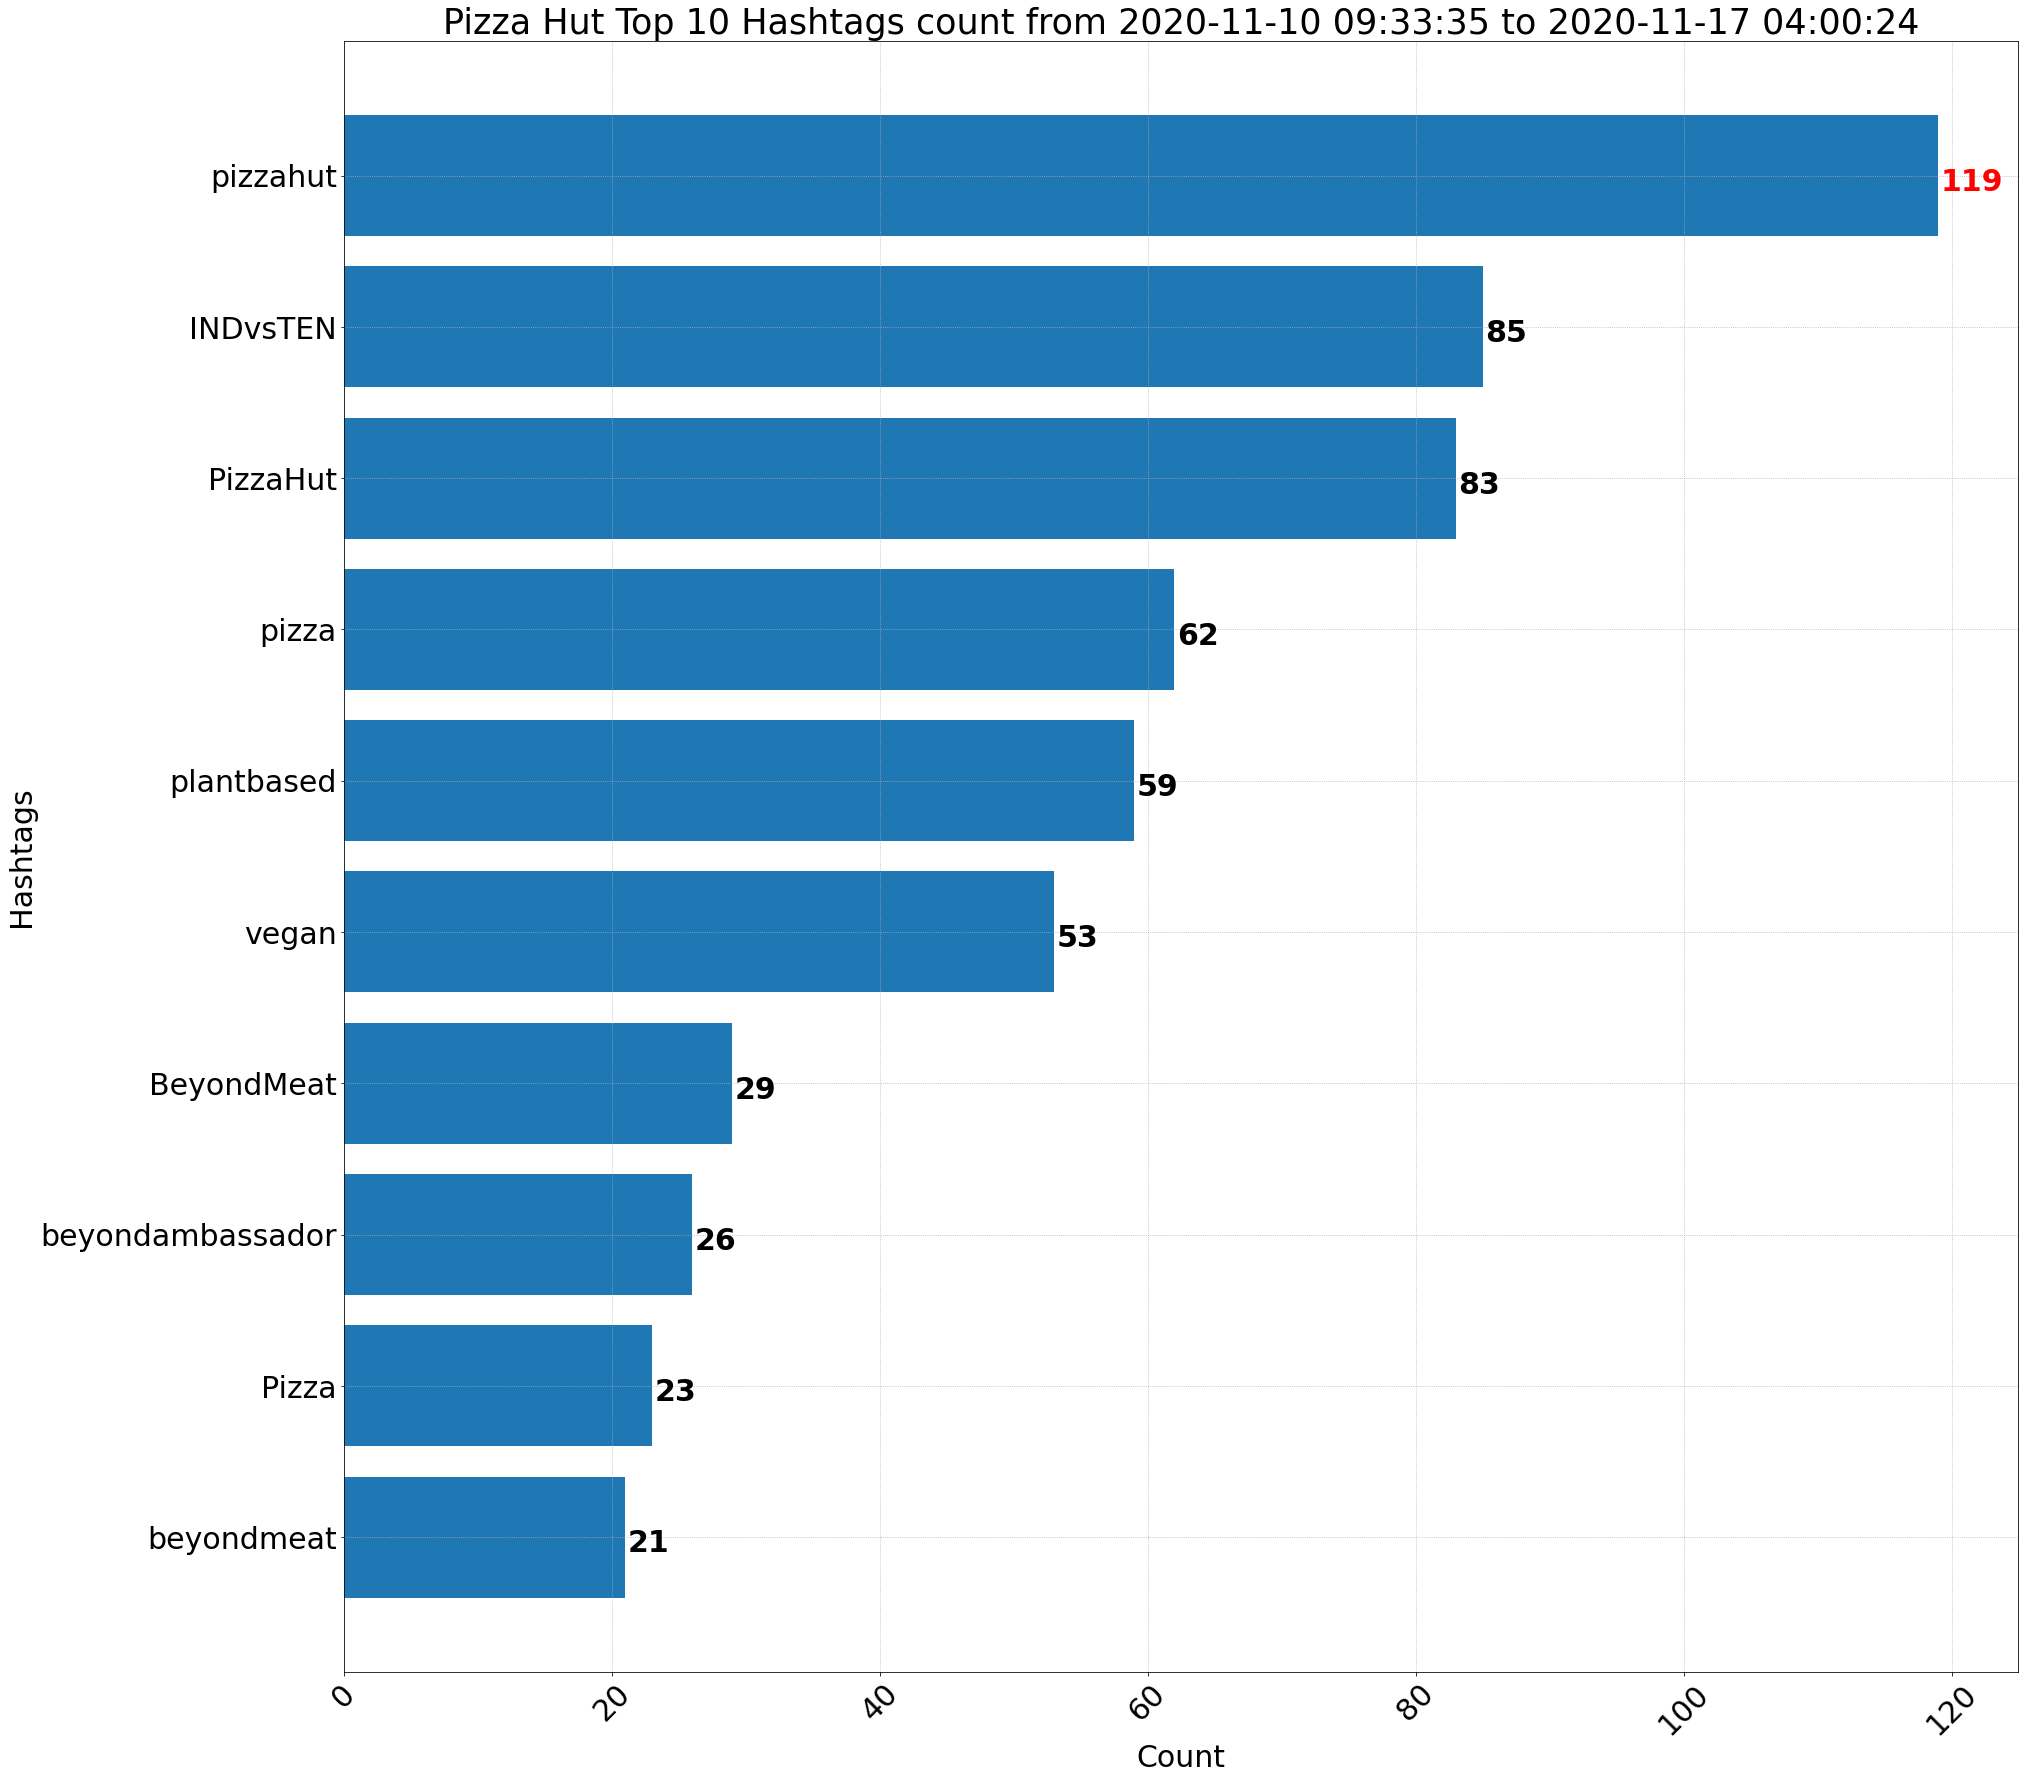

In [162]:
#Pizza Hut brand


get_hashtag_count(df_pizzahut,"Pizza Hut",10,"Hashtags",(30,30),"Top 10 Pizza Hut hashtag.png")